<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/YB_1010_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**오차 행렬(혼동 행렬) 생성**

In [3]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y, y_pred)
cm

array([[337,  20],
       [ 30, 182]])

**정확도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy= accuracy_score(y, y_pred)
accuracy

# 전체 예측 중 맞춘 예측의 비율
# 92퍼센트의 확률로 양성, 음성을 정확히 맞추었다

0.9121265377855887

**정밀도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [5]:
precision= precision_score(y,y_pred)
precision

# 양성이라고 예측한 것 중 맞춘 예측
# 90퍼센트의 확률로 양성이라고 예측한 것이 맞았다.

0.900990099009901

**재현율의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [7]:
recall= recall_score(y,y_pred)
recall

# 실제로 양성인 것 중에 양성이라고 예측한 비율
# 85퍼센트의 확률로 실제 양성 중 맞게 양성이라고 예측되었다

0.8584905660377359

**F1 score의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [8]:
f1= f1_score(y,y_pred)
f1

#f1= 2*precision*recall / precision+recall
#정밀도와 재현율의 조화 평균이며 균형있게 값을 확인할 수 있다


0.8792270531400966

**예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.**

In [19]:
from sklearn.preprocessing import Binarizer

pred_proba= model_lor.predict_proba(X)[:,1]
pred_proba

binarizer= Binarizer(threshold=0.1)
y_pred2= binarizer.fit_transform(pred_proba.reshape(-1,1))

In [12]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
cm2= confusion_matrix(y, y_pred2)
accuracy2= accuracy_score(y, y_pred2)
precision2= precision_score(y,y_pred2)
recall2= recall_score(y,y_pred2)
f12= f1_score(y,y_pred2)
print(cm2)
print(accuracy2)
print(precision2)
print(recall2)
print(f12)

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


**ROC 곡선 시각화**

In [17]:
from sklearn.metrics import roc_curve

y_score=pred_proba
fpr, tpr, thresholds= roc_curve(y,y_score)

auc= roc_auc_score(y,y_score)

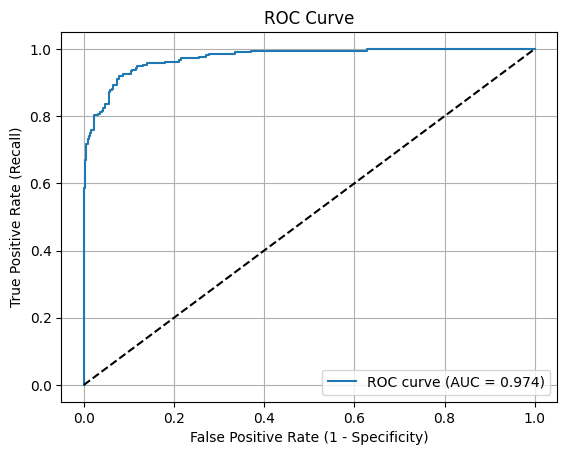

In [22]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')  # 기준선
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

**ROC AUC 값을 구하고 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [21]:
from sklearn.metrics import roc_auc_score

y_proba=model_lor.predict_proba(X)[:,1]

auc= roc_auc_score(y,y_proba)
auc

# ROC곡선 아래의 면적 값을 의미함
# 모델이 분류를 잘 할수록 높은 값-> 0.97 높은 값임

np.float64(0.974076423022039)